In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
sys.path.append("../..")

In [6]:
import os
import json
import math
import numpy as np
import pandas as pd
from explorer.utils import load_states_from_dir
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
%env OPENAI_API_KEY="g"

env: OPENAI_API_KEY="g"


In [4]:
import seaborn as sns

sns.set_context("poster")
sns.set_palette("colorblind")

In [7]:
log_dir = ".logs/split_the_difference/"
game_states = load_states_from_dir(log_dir)

THERE ARE 100 log files
100 Loaded Successfully


In [8]:
game_states = [ g for g in game_states if len(g.game_state) >=2]
print(len(game_states))

100


In [9]:
# extract trade object; keep only if final accepted
trade_proposals =[[ _['player_public_info_dict']['newly proposed trade'] for _ in  g.game_state[1:-1]] for g in game_states if g.game_state[-1]['summary']['final_response']=='ACCEPT'] 

# get final and initial proposal
trade_proposals = [[ _.resources_from_second_agent.resource_dict['ZUP'] for _ in [tp[0], tp[-2]]] for tp in trade_proposals]

# extract ZUP remove none
# trade_proposals = [[ _.resources_from_second_agent.resource_dict['ZUP'] for _ in tp if _ != "NONE"] for tp in trade_proposals]
# print(trade_proposals)
# # keep sequences that are long enough
# trade_proposals = [ tp for tp in trade_proposals if len(tp) >= 3]
# # make triples
# trade_proposals = [[[a,b,c] for a,b,c in zip(tp, tp[1:], tp[2:])] for tp in trade_proposals]
# # flatten

trade_proposals = np.array(trade_proposals)

# print(trade_proposals[0])
# game_states[0].game_state[-1]['summary']
trade_proposals

array([[45, 41],
       [50, 43],
       [50, 43],
       [25, 24],
       [30, 29],
       [35, 32],
       [30, 27],
       [50, 49],
       [25, 24],
       [30, 26],
       [30, 28],
       [50, 45],
       [40, 38],
       [40, 50],
       [40, 37],
       [40, 38],
       [30, 27],
       [30, 28],
       [35, 32],
       [25, 23],
       [35, 32],
       [50, 42],
       [30, 25],
       [40, 37],
       [50, 47],
       [30, 26],
       [35, 31],
       [50, 60],
       [30, 29],
       [45, 42],
       [40, 39],
       [30, 29],
       [50, 42],
       [25, 23],
       [40, 38],
       [35, 34],
       [30, 30],
       [35, 33],
       [40, 38],
       [40, 36],
       [50, 44],
       [35, 32],
       [25, 23],
       [50, 48],
       [35, 33],
       [40, 37],
       [45, 43],
       [40, 34],
       [40, 36],
       [45, 43],
       [50, 42],
       [42, 40],
       [50, 47],
       [25, 38],
       [30, 26],
       [40, 37],
       [30, 27],
       [50, 43],
       [25, 23

In [10]:
# (Trade @ t-1) - (Trade @ t-2)
# proposal_average = (trade_proposals[:, 1] + trade_proposals[:, 0])/2
# new_proposal =  trade_proposals[:, 2]
trade_proposals[:,0]

array([45, 50, 50, 25, 30, 35, 30, 50, 25, 30, 30, 50, 40, 40, 40, 40, 30,
       30, 35, 25, 35, 50, 30, 40, 50, 30, 35, 50, 30, 45, 40, 30, 50, 25,
       40, 35, 30, 35, 40, 40, 50, 35, 25, 50, 35, 40, 45, 40, 40, 45, 50,
       42, 50, 25, 30, 40, 30, 50, 25, 35, 25, 30, 45, 25, 25, 25, 30, 40,
       30, 30, 30, 40, 40, 40, 30, 35, 40, 40, 40, 30, 35, 35, 30, 50, 40,
       30, 30, 30, 30, 35, 30, 35, 30, 45, 30, 30, 30, 30, 40, 30])

[20, 60]


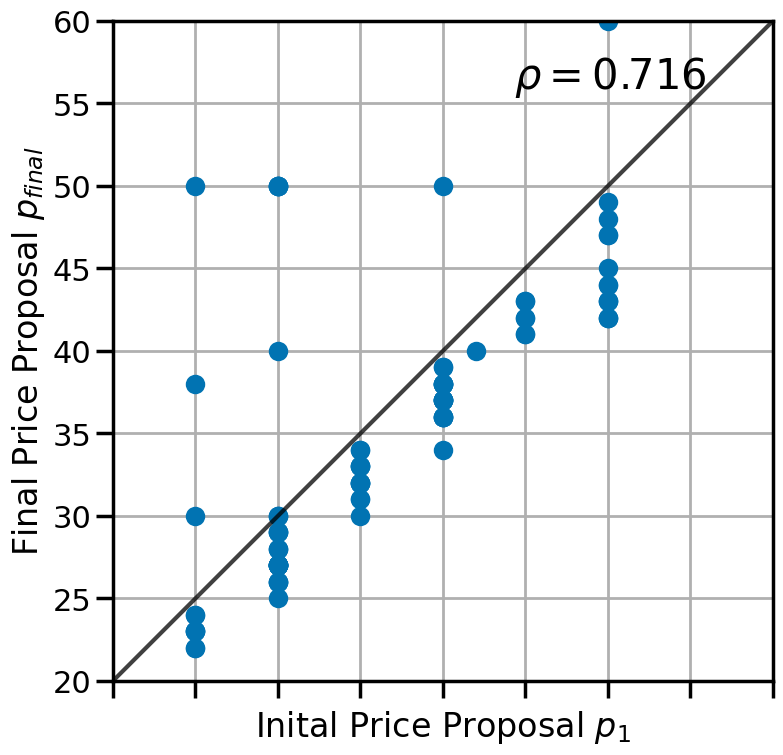

In [20]:
# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(trade_proposals[:,0], trade_proposals[:, 1])
lims = [
    math.floor(np.min([ax.get_xlim(), ax.get_ylim()])),  # min of both axes
    math.ceil(np.max([ax.get_xlim(), ax.get_ylim()])-2),  # max of both axes
]
print(lims)
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10)
ax.set_aspect('equal')
ax.set_axisbelow(True)
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.set_title('TEST')

ax.set_xlabel('Inital Price Proposal $p_{1}$')
ax.set_ylabel('Final Price Proposal $p_{final}$')
ax.grid()

plt.text(0.90, 0.95, r"$\rho=0.716$", transform=plt.gca().transAxes, ha='right', va='top', fontsize = 30)

plt.xticks(*plt.yticks())
plt.tight_layout()

plt.savefig('anchoring_plot.pdf')  

In [37]:
pearsonr(trade_proposals[:,0], trade_proposals[:, 1])

PearsonRResult(statistic=0.6804574906404588, pvalue=6.844934764897455e-15)

In [41]:
spearmanr(trade_proposals[:,0], trade_proposals[:, 1])

SignificanceResult(statistic=0.716223160213156, pvalue=5.446577603881447e-17)